In [20]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import datetime as data
import mplfinance as mpf
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [41]:
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df

,Date,Open,High,Low,Close,Volume
0,2000.01.03,1.00730,1.02780,1.00540,1.02460,6642
1,2000.01.04,1.02430,1.03400,1.02130,1.02920,7339
2,2000.01.05,1.02930,1.04020,1.02840,1.03260,6570
3,2000.01.06,1.03250,1.04150,1.02720,1.03300,7223
4,2000.01.07,1.03290,1.03320,1.02600,1.02980,5689
...,...,...,...,...,...,...
5194,2019.12.24,1.10895,1.10939,1.10690,1.10851,22030
5195,2019.12.26,1.10900,1.11088,1.10820,1.10974,10530
5196,2019.12.27,1.10973,1.11882,1.10940,1.11760,36676
5197,2019.12.30,1.11754,1.12206,1.11713,1.11985,36372


In [42]:
#df.set_index('Date',inplace=True)
def calculate_technical_indicators(data):
    # Calculate 10-day EMA
    data['ema_10'] = ta.ema(data['Close'], length=10)
    
    # Calculate 40-day EMA
    data['ema_40'] = ta.ema(data['Close'], length=40)

    # Calculate 200-day SMA
    data['sma_200'] = ta.sma(data['Close'], length=200)

    # Calculate RSI (14)
    data['rsi_14'] = ta.rsi(data['Close'], length=14)
    data['rsi_7'] = ta.rsi(data['Close'], length=7)
    
    return data
calculate_technical_indicators(df)
df

,Date,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7
0,2000.01.03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN
1,2000.01.04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN
2,2000.01.05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN
3,2000.01.06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN
4,2000.01.07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
5194,2019.12.24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908
5195,2019.12.26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694
5196,2019.12.27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869
5197,2019.12.30,1.11754,1.12206,1.11713,1.11985,36372,1.112863,1.109066,1.114294,66.259571,74.701301


In [46]:
df['mva_trend'] = 'Neutral'
df['rsi_state'] = 'Neutral'

def trade_states(data):
    for row in range(len(data)):
        if np.isnan(data['sma_200'].iloc[row]):
            data.loc[row, 'mva_trend'] = data['mva_trend'].iloc[row]
        else:
            condition = (data['Close'].iloc[row] > data['sma_200'].iloc[row]) or (data['ema_40'].iloc[row] > data['sma_200'].iloc[row])
            data.loc[row, 'mva_trend'] = "Bullish" if condition else "Bearish"

        condition1 = (data['rsi_14'].iloc[row] > 70)
        condition2 = (data['rsi_14'].iloc[row] < 30)
        if condition1:
            data.loc[row, 'rsi_state'] = "Overbought"
        elif condition2:
            data.loc[row, 'rsi_state'] = "Oversold"
        else:
            data.loc[row, 'rsi_state'] = "Neutral"

    return data

df = trade_states(df)
df

,Date,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,mva_trend,rsi_state
0,2000.01.03,1.00730,1.02780,1.00540,1.02460,6642,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral
1,2000.01.04,1.02430,1.03400,1.02130,1.02920,7339,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral
2,2000.01.05,1.02930,1.04020,1.02840,1.03260,6570,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral
3,2000.01.06,1.03250,1.04150,1.02720,1.03300,7223,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral
4,2000.01.07,1.03290,1.03320,1.02600,1.02980,5689,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,2019.12.24,1.10895,1.10939,1.10690,1.10851,22030,1.109951,1.107960,1.114606,49.816216,44.462908,Bearish,Neutral
5195,2019.12.26,1.10900,1.11088,1.10820,1.10974,10530,1.109912,1.108046,1.114443,52.147527,49.930694,Bearish,Neutral
5196,2019.12.27,1.10973,1.11882,1.10940,1.11760,36676,1.111310,1.108512,1.114345,63.739808,71.124869,Bullish,Neutral
5197,2019.12.30,1.11754,1.12206,1.11713,1.11985,36372,1.112863,1.109066,1.114294,66.259571,74.701301,Bullish,Neutral


In [57]:
df['rsi_state'].value_counts()

Neutral       4658
Overbought     311
Oversold       230
Name: rsi_state, dtype: int64

In [64]:
class Indicators:
    def __init__(self, data):
        self.data = data
        self.numerical()
        #self.levels()
        #self.candlestick_patterns()

    def numerical(self):
        # Calculate numerical indicators
        self.data['ema_10'] = ta.ema(self.data['Close'], length=10)
        self.data['ema_40'] = ta.ema(self.data['Close'], length=40)
        self.data['sma_200'] = ta.sma(self.data['Close'], length=200)
        self.data['rsi_14'] = ta.rsi(self.data['Close'], length=14)
        self.data['rsi_7'] = ta.rsi(self.data['Close'], length=7)

        # Calculate moving average trends and RSI states
        self.calculate_mva_trend()
        self.calculate_rsi_state()

    def calculate_mva_trend(self):
        self.data['mva_trend'] = 'Neutral'
        for row in range(len(self.data)):
            if np.isnan(self.data['sma_200'].iloc[row]):
                self.data.loc[row, 'mva_trend'] = self.data['mva_trend'].iloc[row]
            else:
                condition = (self.data['Close'].iloc[row] > self.data['sma_200'].iloc[row]) or (self.data['ema_40'].iloc[row] > self.data['sma_200'].iloc[row])
                self.data.loc[row, 'mva_trend'] = "Bullish" if condition else "Bearish"

    def calculate_rsi_state(self):
        self.data['rsi_state'] = 'Neutral'
        for row in range(len(self.data)):
            condition1 = (self.data['rsi_14'].iloc[row] > 70)
            condition2 = (self.data['rsi_14'].iloc[row] < 30)
            if condition1:
                self.data.loc[row, 'rsi_state'] = "Overbought"
            elif condition2:
                self.data.loc[row, 'rsi_state'] = "Oversold"
            else:
                self.data.loc[row, 'rsi_state'] = "Neutral"

    def get_data(self):
        return self.data

In [65]:
class Signals:
    BUY = 1
    HOLD = 0
    SELL = -1

    def __init__(self, data):
        self.data = data.copy()  # Copy the DataFrame to avoid modifying the original
        self.trade()
        self.position()

    def trade(self):
        for row in range(len(self.data)):
            if self.data['mva_trend'].iloc[row] == 'Bullish':
                self.data['signal'].iloc[row] = np.where(self.data['ema_10'].iloc[row] > self.data['ema_40'].iloc[row], self.BUY, self.HOLD)
            elif self.data['mva_trend'].iloc[row] == 'Bearish':
                self.data['signal'].iloc[row] = np.where(self.data['ema_10'].iloc[row] < self.data['ema_40'].iloc[row], self.SELL, self.HOLD)
            else:
                self.data['signal'].iloc[row] = self.HOLD

    def position(self):
        self.data['position'] = 'Closed'
        for row in range(1, len(self.data)):
            signal_diff = self.data['signal'].iloc[row] - self.data['signal'][row - 1]

            if signal_diff == 1:  # Open Long Position
                self.data.loc[row, 'position'] = 'Long'
                self.data.loc[row, 'entry_price'] = self.data['Close'].iloc[row]

            elif signal_diff == -1:  # Open Short Position
                self.data.loc[row, 'position'] = 'Short'
                self.data.loc[row, 'entry_price'] = self.data['Close'].iloc[row]

            elif signal_diff == 2 and self.data['position'][row - 1] == 'Long':  # Close Long Position
                self.data.loc[row, 'position'] = 'Closed'
                self.data.loc[row, 'exit_price'] = self.data['Close'].iloc[row]

            elif signal_diff == -2 and self.data['position'][row - 1] == 'Short':  # Close Short Position
                self.data.loc[row, 'position'] = 'Closed'
                self.data.loc[row, 'exit_price'] = self.data['Close'].iloc[row]

    def get_data(self):
        return self.data

In [95]:
class Indicators:
    def __init__(self, data):
        self.data = data
        self.numerical()

    def numerical(self):
        # Calculate numerical indicators
        self.data['ema_10'] = ta.ema(self.data['Close'], length=10)
        self.data['ema_40'] = ta.ema(self.data['Close'], length=40)
        self.data['sma_200'] = ta.sma(self.data['Close'], length=200)
        self.data['rsi_14'] = ta.rsi(self.data['Close'], length=14)
        self.data['rsi_7'] = ta.rsi(self.data['Close'], length=7)

        # Calculate moving average trends and RSI states
        self.calculate_mva_trend()
        self.calculate_rsi_state()

    def calculate_mva_trend(self):
        self.data['mva_trend'] = 'Neutral'
        self.data['signal'] = 0  # Initialize the 'signal' column
        for row in range(len(self.data)):
            if np.isnan(self.data['sma_200'].iloc[row]):
                self.data.loc[row, 'mva_trend'] = self.data['mva_trend'].iloc[row]
            else:
                condition = (self.data['Close'].iloc[row] > self.data['sma_200'].iloc[row]) or (self.data['ema_40'].iloc[row] > self.data['sma_200'].iloc[row])
                self.data.loc[row, 'mva_trend'] = "Bullish" if condition else "Bearish"
                # Set initial value for 'signal'
                self.data.loc[row, 'signal'] = 0

    def calculate_rsi_state(self):
        self.data['rsi_state'] = 'Neutral'
        for row in range(len(self.data)):
            condition1 = (self.data['rsi_14'].iloc[row] > 70)
            condition2 = (self.data['rsi_14'].iloc[row] < 30)
            if condition1:
                self.data.loc[row, 'rsi_state'] = "Overbought"
            elif condition2:
                self.data.loc[row, 'rsi_state'] = "Oversold"
            else:
                self.data.loc[row, 'rsi_state'] = "Neutral"

    def get_data(self):
        return self.data


In [110]:
class Signals:
    BUY = 1
    CLOSE = 0
    SELL = -1

    def __init__(self, data):
        self.data = data  # Copy the DataFrame to avoid modifying the original
        self.trade()
        self.position()

    def trade(self):
        for row in range(len(self.data)):
            if self.data['mva_trend'].iloc[row] == 'Bullish':
                self.data['signal'].iloc[row] = np.where(self.data['ema_10'].iloc[row] > self.data['ema_40'].iloc[row], self.BUY, self.CLOSE)
            elif self.data['mva_trend'].iloc[row] == 'Bearish':
                self.data['signal'].iloc[row] = np.where(self.data['ema_10'].iloc[row] < self.data['ema_40'].iloc[row], self.SELL, self.CLOSE)
            else:
                self.data['signal'].iloc[row] = self.CLOSE

    def position(self):
        self.data['position'] = 'Closed'
        self.data['entry_price'] = 0
        self.data['exit_price'] = 0
        for row in range(1, len(self.data)):
            signal_diff = self.data['signal'].iloc[row] - self.data['signal'][row - 1]

            if signal_diff == 1 and self.data['position'][row - 1] == 'Closed':  # Open Long Position
                self.data.loc[row, 'position'] = 'Long'
                self.data.loc[row, 'entry_price'] = self.data['Close'].iloc[row]

            elif signal_diff == -1 and self.data['position'][row - 1] == 'Closed':  # Open Short Position
                self.data.loc[row, 'position'] = 'Short'
                self.data.loc[row, 'entry_price'] = self.data['Close'].iloc[row]

            elif signal_diff == -1 and self.data['position'][row - 1] == 'Long':  # Close Long Position
                self.data.loc[row, 'position'] = 'Closed'
                self.data.loc[row, 'exit_price'] = self.data['Close'].iloc[row]

            elif signal_diff == 1 and self.data['position'][row - 1] == 'Short':  # Close Short Position
                self.data.loc[row, 'position'] = 'Closed'
                self.data.loc[row, 'exit_price'] = self.data['Close'].iloc[row]
            
            else:
                self.data.loc[row, 'position'] = self.data.loc[row-1, 'position']
                self.data.loc[row, 'entry_price'] = self.data.loc[row-1, 'entry_price']
                self.data.loc[row, 'exit_price'] = self.data.loc[row-1, 'exit_price']

    def get_data(self):
        return self.data


In [128]:

# Load data from CSV file
raw_data = pd.read_csv('eurusd\EURUSD_Daily_200001030000_201912310000.csv')
df = raw_data.copy()
df['Date'] = pd.to_datetime(df['Date'])
# Create Indicators instance
indicators = Indicators(df)
modified_df = indicators.get_data()

# Create Signals instance
signals = Signals(modified_df)
modified_df_with_signals = signals.get_data()
modified_df_with_signals.set_index('Date',inplace=True)
modified_df_with_signals[200:251]


C:\Users\27722\AppData\Local\Temp\ipykernel_23524\2239784393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['signal'].iloc[row] = self.CLOSE
C:\Users\27722\AppData\Local\Temp\ipykernel_23524\2239784393.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data['signal'].iloc[row] = np.where(self.data['ema_10'].iloc[row] < self.data['ema_40'].iloc[row], self.SELL, self.CLOSE)
C:\Users\27722\AppData\Local\Temp\ipykernel_23524\2239784393.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,mva_trend,signal,rsi_state,position,entry_price,exit_price
Date,,,,,,,,,,,,,,,,
2000-10-09,0.8685,0.8712,0.8666,0.8684,4614,0.872259,0.882411,0.939270,43.179670,40.628571,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-10,0.8684,0.8746,0.8659,0.8715,6098,0.872121,0.881879,0.938482,46.004768,47.997809,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-11,0.8715,0.8768,0.8640,0.8649,6446,0.870808,0.881051,0.937643,41.296999,36.687146,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-12,0.8650,0.8682,0.8612,0.8626,6364,0.869316,0.880151,0.936791,39.769669,33.479569,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-13,0.8627,0.8660,0.8528,0.8564,6466,0.866967,0.878992,0.935924,35.913784,26.259252,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-16,0.8557,0.8561,0.8459,0.8503,6547,0.863937,0.877592,0.935050,32.568083,21.048672,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-17,0.8505,0.8565,0.8475,0.8542,6560,0.862167,0.876451,0.934153,36.632621,31.227547,Bearish,-1,Neutral,Short,0.8682,0.0000
2000-10-18,0.8545,0.8573,0.8326,0.8387,6997,0.857900,0.874610,0.933192,29.120037,19.544119,Bearish,-1,Oversold,Short,0.8682,0.0000
2000-10-19,0.8390,0.8446,0.8383,0.8427,7275,0.855136,0.873053,0.932276,32.941987,27.689457,Bearish,-1,Neutral,Short,0.8682,0.0000


In [90]:
modified_df_with_signals[2420:2471]

,Date,Open,High,Low,Close,Volume,ema_10,ema_40,sma_200,rsi_14,rsi_7,mva_trend,signal,rsi_state,position,entry_price,exit_price
2420,2009.04.20,1.30406,1.30481,1.28889,1.29241,42049,1.316564,1.316340,1.365386,39.438612,26.670358,Bearish,0,Neutral,Closed,0.00000,1.34910
2421,2009.04.21,1.29247,1.29934,1.28967,1.29454,45420,1.312560,1.315277,1.363890,40.450555,29.329702,Bearish,-1,Neutral,Short,1.29454,0.00000
2422,2009.04.22,1.29455,1.30364,1.28844,1.30022,54197,1.310316,1.314542,1.362439,43.177246,36.494763,Bearish,-1,Neutral,Short,1.29454,0.00000
2423,2009.04.23,1.30021,1.31602,1.29792,1.31336,56347,1.310869,1.314484,1.361050,48.995569,50.138718,Bearish,-1,Neutral,Short,1.29454,0.00000
2424,2009.04.24,1.31335,1.33002,1.31125,1.32413,55419,1.313280,1.314955,1.359761,53.223325,58.636655,Bearish,-1,Neutral,Short,1.29454,0.00000
2425,2009.04.27,1.32401,1.32416,1.29990,1.30173,60339,1.311180,1.314310,1.358341,44.889186,41.481808,Bearish,-1,Neutral,Short,1.29454,0.00000
2426,2009.04.28,1.30171,1.31655,1.29649,1.31351,58331,1.311604,1.314271,1.356985,49.378459,50.387242,Bearish,-1,Neutral,Short,1.29454,0.00000
2427,2009.04.29,1.31354,1.33402,1.31199,1.32521,57956,1.314078,1.314804,1.355649,53.435586,57.824485,Bearish,-1,Neutral,Short,1.29454,0.00000
2428,2009.04.30,1.32553,1.33848,1.31910,1.32236,44100,1.315584,1.315173,1.354367,52.335261,55.461735,Bearish,0,Neutral,Closed,0.00000,1.32236
2429,2009.05.01,1.32235,1.33274,1.32181,1.32636,37907,1.317543,1.315719,1.353157,53.773983,58.254760,Bearish,0,Neutral,Closed,0.00000,1.32236


In [125]:
def trade_results(data):
    trades_list = []
    current_trade = 1
    entry_price = 0
    entry_date = None
    for row in range(1, len(data)):
        signal_diff = data['signal'][row] - data['signal'][row - 1]

        if signal_diff == 1 and data['position'][row - 1] == 'Closed':
            entry_price = data['Close'][row]
            entry_date = data.index[row]
        elif signal_diff == -1 and data['position'][row - 1] == 'Closed':  # Open Short Position
            entry_price = data['Close'][row]
            entry_date = data.index[row]
        elif signal_diff == -1 and data['position'][row - 1] == 'Long': # Close Long Position
            exit_price = data['Close'][row]
            exit_date = data.index[row]
            trade_value = exit_price - entry_price
            trade_result = 'Success' if trade_value > 0 else 'Fail'
            trades_list.append({
                'trade': current_trade,
                'entry_date': entry_date,
                'entry_price': entry_price,
                'exit_date': exit_date,
                'exit_price': exit_price,
                'position': 'Long',
                'value': trade_value,
                'result': trade_result
            })
            current_trade += 1
        elif signal_diff == 1 and data['position'][row - 1] == 'Short':  # Close Short Position
            exit_price = data['Close'][row]
            exit_date = data.index[row]
            trade_value = entry_price - exit_price
            trade_result = 'Success' if trade_value > 0 else 'Fail'
            trades_list.append({
                'trade': current_trade,
                'entry_date': entry_date,
                'entry_price': entry_price,
                'exit_date': exit_date,
                'exit_price': exit_price,
                'position': 'Short',
                'value': trade_value,
                'result': trade_result
            })
            current_trade += 1

    trades_df = pd.concat([pd.DataFrame([trade]) for trade in trades_list], ignore_index=True)
    return trades_df

In [129]:
pd.set_option('display.max_rows', 150)

In [130]:
trade_results_df = trade_results(modified_df_with_signals)
trade_results_df

,trade,entry_date,entry_price,exit_date,exit_price,position,value,result
0,1,2000-10-06,0.86820,2000-12-01,0.87920,Short,-0.01100,Fail
1,2,2000-12-20,0.90940,2001-02-15,0.90560,Long,-0.00380,Fail
2,3,2001-03-02,0.93630,2001-03-15,0.89860,Long,-0.03770,Fail
3,4,2001-05-15,0.87850,2001-07-19,0.87210,Short,0.00640,Success
4,5,2001-08-09,0.89210,2001-09-04,0.88830,Long,-0.00380,Fail
5,6,2001-09-07,0.90760,2001-10-18,0.90350,Long,-0.00410,Fail
6,7,2001-12-14,0.90260,2001-12-24,0.87900,Long,-0.02360,Fail
7,8,2002-01-03,0.89930,2002-01-15,0.88360,Long,-0.01570,Fail
8,9,2002-01-29,0.86520,2002-03-14,0.88260,Short,-0.01740,Fail
9,10,2002-03-29,0.87190,2002-04-01,0.88040,Short,-0.00850,Fail


In [131]:
trade_results_df['value'].sum()

0.06813000000000113

In [132]:
trade_results_df['result'].value_counts()

Fail       84
Success    27
Name: result, dtype: int64

In [135]:
# Assuming trade_results_df is your DataFrame
results_pivot = trade_results_df.groupby(['position', 'result']).agg({'value': ['sum', 'mean', lambda x: len(x) / len(trade_results_df) * 100]})

# Rename the columns for clarity
results_pivot.columns = ['total_value', 'average_value', 'percentage_of_total']

# Reset the index to make 'position' and 'result' regular columns
results_pivot = results_pivot.reset_index()
results_pivot

,position,result,total_value,average_value,percentage_of_total
0,Long,Fail,-0.52694,-0.014637,32.432432
1,Long,Success,0.67838,0.048456,12.612613
2,Short,Fail,-0.89645,-0.018676,43.243243
3,Short,Success,0.81314,0.062549,11.711712


In [147]:
from matplotlib.patches import Rectangle

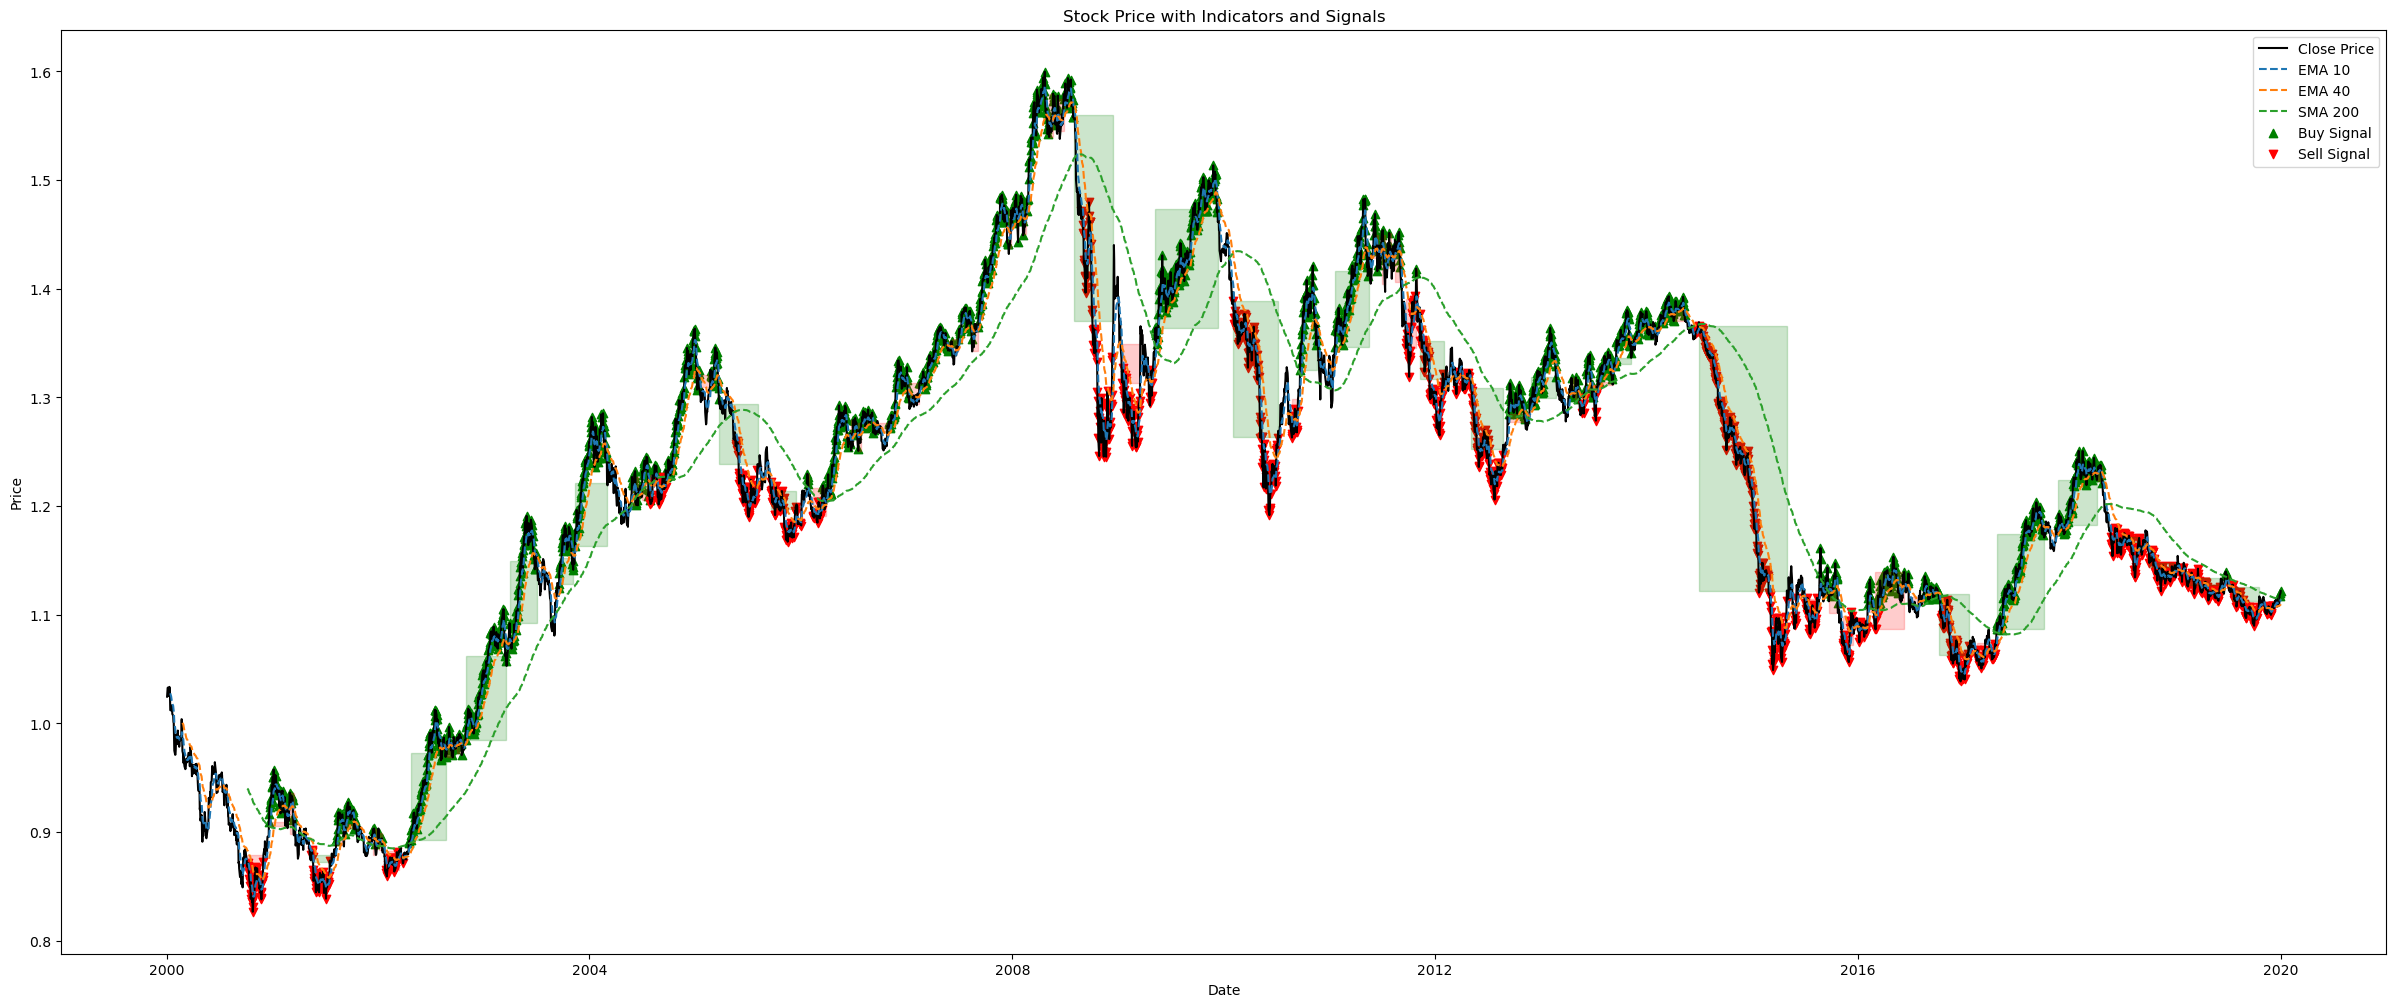

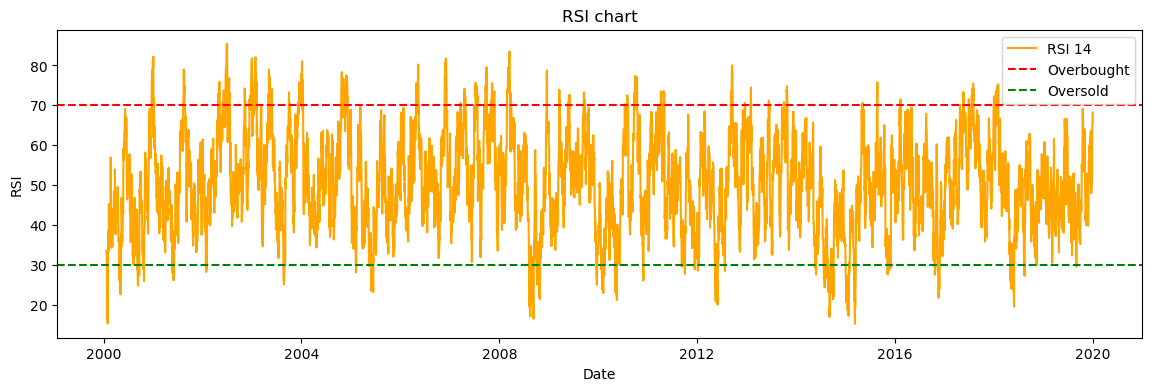

In [148]:
df = modified_df_with_signals.copy()
plt.figure(figsize=(30, 12))

# Plot Close Price
plt.plot(df['Close'], label='Close Price', color='black')

# Plot Indicators
plt.plot(df['ema_10'], label='EMA 10', linestyle='dashed')
plt.plot(df['ema_40'], label='EMA 40', linestyle='dashed')
plt.plot(df['sma_200'], label='SMA 200', linestyle='dashed')

# Plot Signals
buy_signals = df[df['signal'] == 1]
sell_signals = df[df['signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Close'], marker='^', color='g', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['Close'], marker='v', color='r', label='Sell Signal')

for trade in trade_results_df.itertuples():
    if trade.result == 'Success':
        height = trade.exit_price - trade.entry_price
        rect = Rectangle((trade.entry_date, trade.entry_price), trade.exit_date - trade.entry_date, height, linewidth=1, edgecolor='green', facecolor='green', alpha=0.2)
        plt.gca().add_patch(rect)
    elif trade.result == 'Fail':
        height = trade.exit_price - trade.entry_price
        rect = Rectangle((trade.entry_date, trade.entry_price), trade.exit_date - trade.entry_date, height, linewidth=1, edgecolor='red', facecolor='red', alpha=0.2)
        plt.gca().add_patch(rect)

plt.title('Stock Price with Indicators and Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
# Plot RSI
plt.figure(figsize=(14, 4))  # Separate subplot for RSI
plt.plot(df['rsi_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold')

# Customize the plot
plt.title('RSI chart')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()